In [2]:
# Data Manupulation
import numpy as np
import pandas as pd


# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score

# CSV File - Read
df = pd.read_csv('C:\\Users\\radha\\Downloads\LGD_DATA.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']

print(df.head(5)) 

print(df.ndim)

print(df.shape)

dfInput = df.iloc[:,1:5] # 0  is not required
#print(df2.head())

#print(df.head())

dfoutput = df.iloc[:,-1]
#print(df3.head())



split = int(0.8*len(df))
#print(df2[:split])
#print(df2[:split].shape)

#print(df3[:split])
#print(df3[:split].shape)

#dfInput= x , dfoutput=Y

X_train, X_test, Y_train, Y_test = dfInput[:split], dfInput[split:], dfoutput[:split], dfoutput[split:]
#print(X_train.shape)
#print(Y_train.shape)
model = LogisticRegression()
print(model)

    Ac_No  Age  Years of Experience  Number of Vehicles Gender  Married  \
0  150024   24                    5                   1      M  Married   
1  144880   31                   10                   1      F   Single   
2  133742   56                   37                   1      M  Married   
3  151282   52                   31                   1      F  Married   
4  174407   20                    3                   1      M   Single   

   Losses in Thousands  
0           203.319595  
1           402.197302  
2           553.132096  
3           292.430579  
4           246.540576  
2
(15290, 7)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [3]:
from sklearn import preprocessing
from sklearn import utils
# .MultiLabelBinarizer()  LabelEncoder LabelBinarizer
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(Y_train)
#print(encoded)
model = model.fit(X_train,encoded )
ms = model.score(X_train,encoded)
print("model score::",ms)

## need to get Dummy variables for Gender and Married columns

ValueError: could not convert string to float: 'M'

In [5]:
# pd.get_dummies allows to convert a categorical variable into dummy variables
# Create a set of dummy variables from the sex variable
df_Gender = pd.get_dummies(df['Gender'])
df_Married = pd.get_dummies(df['Married'])
# Join the dummy variables to the main dataframe
df_new = pd.concat([df, df_Gender], axis=1)
df_new = pd.concat([df_new, df_Married], axis=1)         
df_new                               

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands,F,M,Married,Single
0,150024,24,5,1,M,Married,203.319595,0,1,1,0
1,144880,31,10,1,F,Single,402.197302,1,0,0,1
2,133742,56,37,1,M,Married,553.132096,0,1,1,0
3,151282,52,31,1,F,Married,292.430579,1,0,1,0
4,174407,20,3,1,M,Single,246.540576,0,1,0,1
5,142548,29,8,1,M,Married,384.676395,0,1,1,0
6,183396,36,19,1,F,Single,462.158856,1,0,0,1
7,106838,67,49,1,F,Married,168.934036,1,0,1,0
8,137434,69,48,1,M,Single,69.893041,0,1,0,1
9,192628,16,0,1,F,Single,242.772576,1,0,0,1


In [17]:


dfClean = df_new[['Age','Number of Vehicles','F','Single','Losses in Thousands']].copy()
print(dfClean.head(5)) 



   Age  Number of Vehicles  F  Single  Losses in Thousands
0   24                   1  0       0           203.319595
1   31                   1  1       1           402.197302
2   56                   1  0       0           553.132096
3   52                   1  1       0           292.430579
4   20                   1  0       1           246.540576


In [19]:
dfClean = dfClean.rename(columns={'Number of Vehicles': 'nVeh', 'Losses in Thousands': 'LTh'})
print(dfClean.head(5)) 

dfInput = dfClean.iloc[:,0:4] 

dfoutput = dfClean.iloc[:,-1]
split = int(0.8*len(dfClean))
X_train, X_test, Y_train, Y_test = dfInput[:split], dfInput[split:], dfoutput[:split], dfoutput[split:]

model = LogisticRegression()
print(model)

   Age  nVeh  F  Single         LTh
0   24     1  0       0  203.319595
1   31     1  1       1  402.197302
2   56     1  0       0  553.132096
3   52     1  1       0  292.430579
4   20     1  0       1  246.540576
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [20]:
from sklearn import preprocessing
from sklearn import utils
# .MultiLabelBinarizer()  LabelEncoder LabelBinarizer
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(Y_train)
#print(encoded)
model = model.fit(X_train,encoded )
ms = model.score(X_train,encoded)
print("model score::",ms)


model score:: 0.000817527795945


In [22]:
dfClean.describe()
import numpy as np
# Categorise Rating to Binary
dfClean['RatingScore'] = np.where(dfClean['LTh']>=350, 1, 0)
print(dfClean.head())

   Age  nVeh  F  Single         LTh  RatingScore
0   24     1  0       0  203.319595            0
1   31     1  1       1  402.197302            1
2   56     1  0       0  553.132096            1
3   52     1  1       0  292.430579            0
4   20     1  0       1  246.540576            0


In [26]:
# Remove unwanted columns

dfClean2 = dfClean.drop(['LTh'], axis=1)
print(dfClean2.head())

   Age  nVeh  F  Single  RatingScore
0   24     1  0       0            0
1   31     1  1       1            1
2   56     1  0       0            1
3   52     1  1       0            0
4   20     1  0       1            0


In [29]:
dfInput = dfClean.iloc[:,0:4] 
print(dfInput.head())
dfoutput = dfClean.iloc[:,-1]
print(dfoutput.head())


split = int(0.8*len(dfClean))
X_train, X_test, Y_train, Y_test = dfInput[:split], dfInput[split:], dfoutput[:split], dfoutput[split:]

model = LogisticRegression()
print(model)

   Age  nVeh  F  Single
0   24     1  0       0
1   31     1  1       1
2   56     1  0       0
3   52     1  1       0
4   20     1  0       1
0    0
1    1
2    1
3    0
4    0
Name: RatingScore, dtype: int32
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [35]:
from sklearn import preprocessing
from sklearn import utils

model = model.fit(X_train,Y_train )
ms = model.score(X_train,Y_train)
print("model score::",ms)

probability = model.predict_proba(X_test)
print(probability)
print("*" * 100)
print("Confusion Matrix")
predicted = model.predict(X_test)
print(metrics.confusion_matrix(Y_test , predicted))

model score:: 0.697269457162
[[ 0.56517827  0.43482173]
 [ 0.29139554  0.70860446]
 [ 0.11773683  0.88226317]
 ..., 
 [ 0.91495473  0.08504527]
 [ 0.30976992  0.69023008]
 [ 0.48099462  0.51900538]]
****************************************************************************************************
[[1022  463]
 [ 453 1120]]


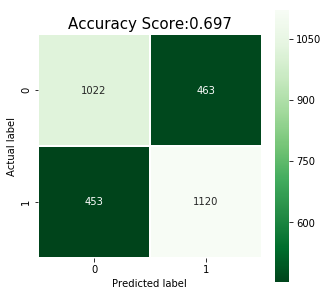

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test , predicted)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.8, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score:{:0.3f}'.format(ms)
plt.title(all_sample_title, size = 15);


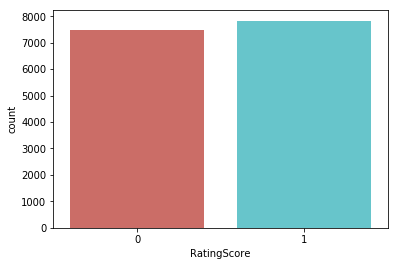

In [48]:
sns.countplot(x='RatingScore',data=dfClean, palette='hls')

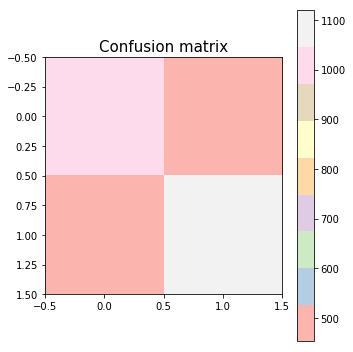

In [50]:
plt.figure(figsize=(5,5))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
plt.tight_layout()
width, height = cm.shape

In [56]:

print(metrics.classification_report(Y_test, predicted))




             precision    recall  f1-score   support

          0       0.69      0.69      0.69      1485
          1       0.71      0.71      0.71      1573

avg / total       0.70      0.70      0.70      3058



C:\ProgramData\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\ProgramData\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


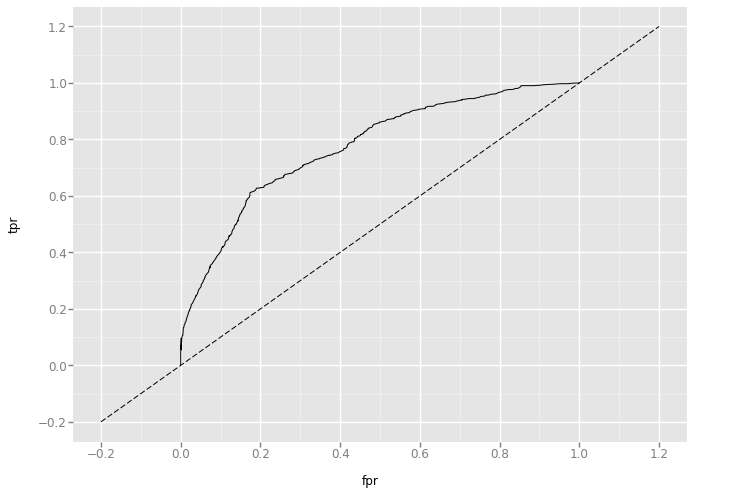

<ggplot: (-9223372007577400106)>

In [57]:
# ROC curve
from sklearn import metrics
import ggplot
from ggplot import *
%matplotlib inline
preds = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
 geom_line() +\
 geom_abline(linetype='dashed')

0.775054208112


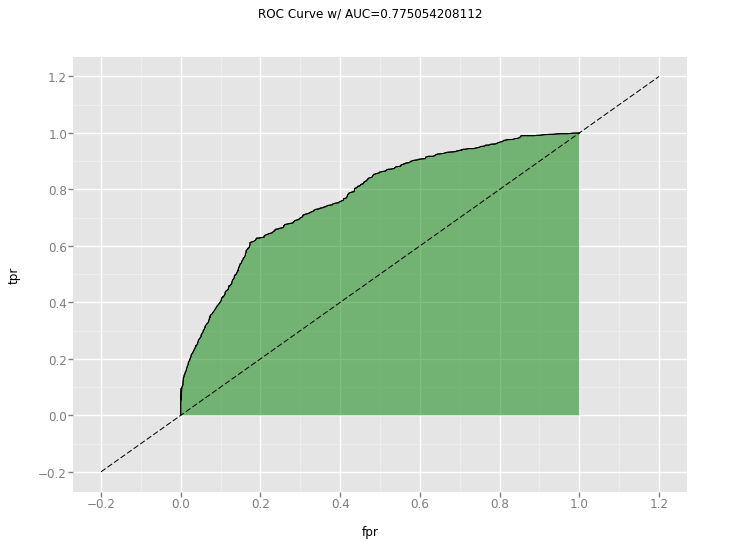

<ggplot: (-9223372007581552212)>

In [58]:
auc = metrics.auc(fpr,tpr)
print(auc)

ggplot(df, aes(x='fpr', y='tpr')) +\
geom_area(alpha=0.5,fill='green') +\
geom_line(aes(y='tpr')) +\
geom_line() +\
geom_abline(linetype='dashed')+\
ggtitle("ROC Curve w/ AUC=%s" % str(auc))

In [ ]:
# Linear Regression
